# Utils

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils import Dataset

# Depresjon dataset

Load dataset:

In [2]:
dataset = Dataset(dirpath=os.path.join("data", "depresjon"))

Basic information:

In [3]:
print("Condition num:", len(dataset.condition))
print("Control num:", len(dataset.control))
print("All samples num:", len(dataset.condition) + len(dataset.control))

Condition num: 23
Control num: 32
All samples num: 55


Data structure:

In [4]:
dataset.condition[0]

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0
23240,2003-05-23 15:20:00,2003-05-23,0
23241,2003-05-23 15:21:00,2003-05-23,0
23242,2003-05-23 15:22:00,2003-05-23,0


## Daily activity plots

Plots of 24h activity for 2 conditions and 2 controls:

<AxesSubplot:title={'center':'1st condition 24h activity'}, xlabel='Time', ylabel='activity'>

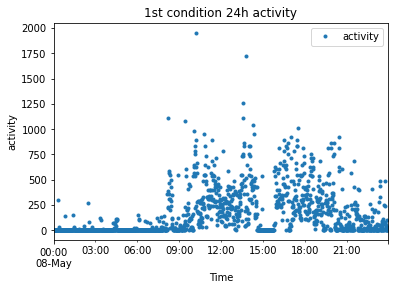

In [5]:
condition = dataset.condition[0]

condition = condition[(condition["timestamp"] >= "2003-05-08") & \
                      (condition["timestamp"] < "2003-05-09")]

condition.index = pd.to_datetime(condition["timestamp"])
condition = condition.drop("timestamp", axis=1)

condition = condition["activity"].to_frame()

condition.plot(style=".", title="1st condition 24h activity", xlabel="Time", ylabel="activity")

<AxesSubplot:title={'center':'2nd condition 24h activity'}, xlabel='Time', ylabel='activity'>

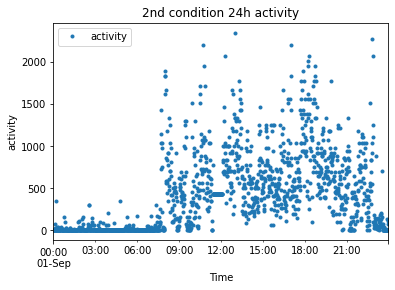

In [6]:
condition = dataset.condition[1]

condition = condition[(condition["timestamp"] >= "2004-09-01 00:00:00") & \
                      (condition["timestamp"] < "2004-09-02 00:00:00")]

condition.index = pd.to_datetime(condition["timestamp"])
condition = condition.drop("timestamp", axis=1)

condition = condition["activity"].to_frame()

condition.plot(style=".", title="2nd condition 24h activity", xlabel="Time", ylabel="activity")

In [7]:
control = dataset.control[0]
control

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293
...,...,...,...
51606,2003-04-23 12:06:00,2003-04-23,3
51607,2003-04-23 12:07:00,2003-04-23,3
51608,2003-04-23 12:08:00,2003-04-23,3
51609,2003-04-23 12:09:00,2003-04-23,3


<AxesSubplot:title={'center':'1st control 24h activity'}, xlabel='Time', ylabel='activity'>

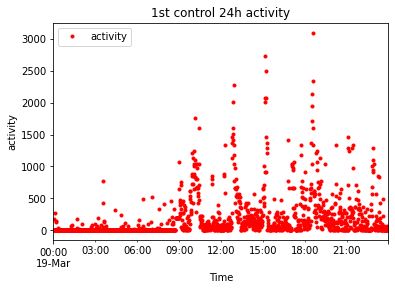

In [8]:
control = dataset.control[0]

control = control[(control["timestamp"] >= "2003-03-19 00:00:00") & \
                  (control["timestamp"] < "2003-03-20 00:00:00")]

control.index = pd.to_datetime(control["timestamp"])
control = control.drop("timestamp", axis=1)

control = control["activity"].to_frame()

control.plot(style=".", title="1st control 24h activity", xlabel="Time", ylabel="activity", c="r")

<AxesSubplot:title={'center':'2nd control 24h activity'}, xlabel='Time', ylabel='activity'>

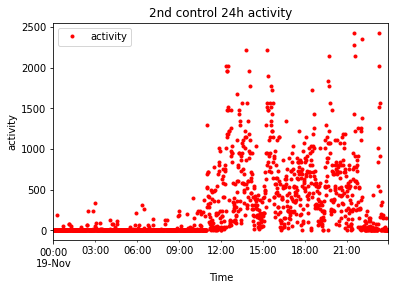

In [9]:
control = dataset.control[1]

control = control[(control["timestamp"] >= "2003-11-19 00:00:00") & \
                  (control["timestamp"] < "2003-11-20 00:00:00")]

control.index = pd.to_datetime(control["timestamp"])
control = control.drop("timestamp", axis=1)

control = control["activity"].to_frame()

control.plot(style=".", title="2nd control 24h activity", xlabel="Time", ylabel="activity", c="r")

## Night activity plots

Night (from 22:00 to 8:00) activity plots for 3 last conditions and 3 last controls:

<AxesSubplot:xlabel='timestamp'>

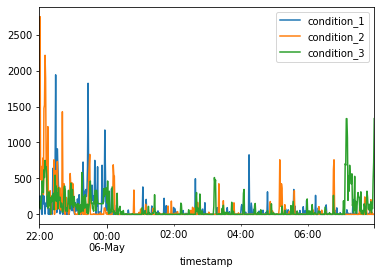

In [10]:
conditions = dataset.condition[-3:]

condition_1 = conditions[0]
condition_1 = condition_1[(condition_1["timestamp"] >= "2004-05-05 22:00:00") & \
                          (condition_1["timestamp"] < "2004-05-06 08:00:00")]

condition_2 = conditions[1]
condition_2 = condition_2[(condition_2["timestamp"] >= "2004-05-07 22:00:00") & \
                          (condition_2["timestamp"] < "2004-05-08 08:00:00")]

condition_3 = conditions[2]
condition_3 = condition_3[(condition_3["timestamp"] >= "2004-05-27 22:00:00") & \
                          (condition_3["timestamp"] < "2004-05-28 08:00:00")]


df = pd.DataFrame({
    "condition_1": condition_1["activity"].values,
    "condition_2": condition_2["activity"].values,
    "condition_3": condition_3["activity"].values
})

index = pd.to_datetime(condition_1["timestamp"])
df.index = index

df.plot(kind="line")

<AxesSubplot:xlabel='timestamp'>

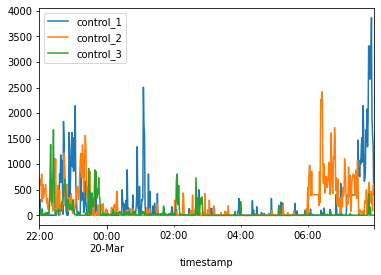

In [11]:
controls = dataset.control[-3:]

control_1 = controls[0]
control_1 = control_1[(control_1["timestamp"] >= "2003-03-19 22:00:00") & \
                      (control_1["timestamp"] < "2003-03-20 08:00:00")]

control_2 = controls[1]
control_2 = control_2[(control_2["timestamp"] >= "2003-11-05 22:00:00") & \
                      (control_2["timestamp"] < "2003-11-06 08:00:00")]

control_3 = controls[2]
control_3 = control_3[(control_3["timestamp"] >= "2003-11-12 22:00:00") & \
                      (control_3["timestamp"] < "2003-11-13 08:00:00")]


df = pd.DataFrame({
    "control_1": control_1["activity"].values,
    "control_2": control_2["activity"].values,
    "control_3": control_3["activity"].values
})

index = pd.to_datetime(control_1["timestamp"])
df.index = index

df.plot(kind="line")

## Value distributions plots

Plots of value distributions for 2 conditions and 2 controls, with default resolution (1 minute).

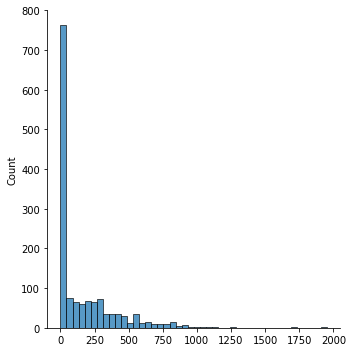

In [12]:
condition = dataset.condition[0]

condition = condition[(condition["timestamp"] >= "2003-05-08") & \
                      (condition["timestamp"] < "2003-05-09")]

condition.index = pd.to_datetime(condition["timestamp"])
condition = condition.drop("timestamp", axis=1)

condition = condition["activity"].values
sns.displot(condition)

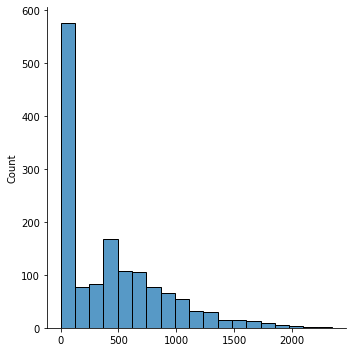

In [13]:
condition = dataset.condition[1]

condition = condition[(condition["timestamp"] >= "2004-09-01 00:00:00") & \
                      (condition["timestamp"] < "2004-09-02 00:00:00")]

condition.index = pd.to_datetime(condition["timestamp"])
condition = condition.drop("timestamp", axis=1)

condition = condition["activity"].values
sns.displot(condition)

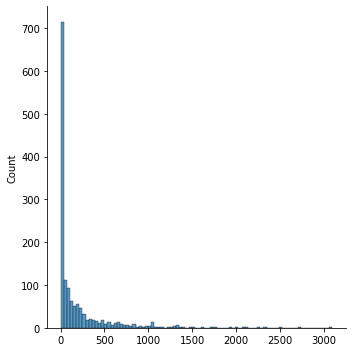

In [14]:
control = dataset.control[0]

control = control[(control["timestamp"] >= "2003-03-19 00:00:00") & \
                  (control["timestamp"] < "2003-03-20 00:00:00")]

control.index = pd.to_datetime(control["timestamp"])
control = control.drop("timestamp", axis=1)

control = control["activity"].values
sns.displot(control)

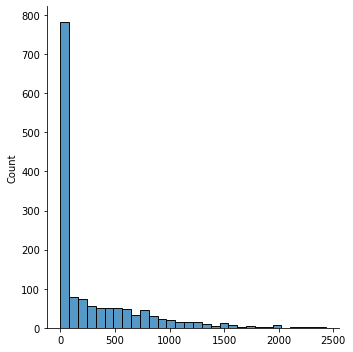

In [15]:
control = dataset.control[1]

control = control[(control["timestamp"] >= "2003-11-19 00:00:00") & \
                  (control["timestamp"] < "2003-11-20 00:00:00")]

control.index = pd.to_datetime(control["timestamp"])
control = control.drop("timestamp", axis=1)

control = control["activity"].values
sns.displot(control)

## Class balance

Condition number: 3
Control number: 3


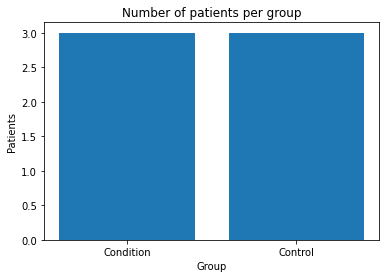

In [16]:
xs = ["Condition", "Control"]
ys = [len(conditions), len(controls)]

print(f"Condition number: {len(conditions)}")
print(f"Control number: {len(controls)}")

plt.bar(xs, ys)
plt.xlabel("Group")
plt.ylabel("Patients")
plt.title("Number of patients per group")
plt.show()

## Condition vs control basic statistical description

In [21]:
condition_rows = pd.Series([len(df) for df in dataset.condition])
print("Condition")
condition_rows.describe()

Condition


count       23.000000
mean     23987.652174
std       5748.966513
min      19299.000000
25%      21463.000000
50%      21648.000000
75%      23117.000000
max      41847.000000
dtype: float64

In [22]:
control_rows = pd.Series([len(df) for df in dataset.control])
print("Control")
control_rows.describe()

Control


count       32.000000
mean     31874.687500
std      12228.922745
min      20490.000000
25%      22258.500000
50%      28257.000000
75%      33683.000000
max      65407.000000
dtype: float64

## Missing values

In [23]:
condition_NaNs = pd.Series([df["activity"].isna().sum() for df in dataset.condition])
condition_NaNs.mean()

0.0

In [24]:
control_NaNs = pd.Series([df["activity"].isna().sum() for df in controls])
control_NaNs.mean()

0.0

# Psykose dataset